In [2]:
import networkx as nx
import pandas as pd
import numpy as np

In [6]:
infection_data_file= 'infection.xlsx'
infection_data = pd.read_excel(infection_data_file,sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [7]:
infection_data.columns


Index(['Incidence_number', 'Identification_number', 'Sanitized',
       'Infected_Flag', 'Entity_Flag', 'confirm_Date', 'Contacted', 'Phone',
       'Monitored_Till', 'cluster', 'Remarks'],
      dtype='object')

In [8]:
infection_data[['Identification_number','Contacted']]

,Identification_number,Contacted
0,H1,H1


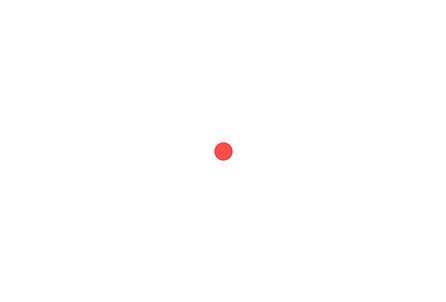

In [59]:
# first case is detected
G = nx.from_pandas_edgelist(infection_data[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
infection_data['color'] = np.where(infection_data['Infected_Flag']=='Yes', 'r', 'y')
color_dct = infection_data[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G.nodes()]
nx.draw(G, node_color=values,label=True, alpha = 0.7)


In [53]:
infection_data_2 = pd.read_excel(infection_data_file,sheet_name=1,
header=0,
index_col=False,
keep_default_na=True
)

In [60]:
infection_data_2['color'] = np.where(infection_data_2['Infected_Flag']=='Yes', 'r', 'y')
infection_data_2

,Incidence_number,Identification_number,Sanitized,Infected_Flag,Entity_Flag,confirm_Date,Contacted,Phone,Monitored_Till,cluster,Remarks,color
0,1,H1,NaN,Yes,Human,2019-12-15,H1,#1,NaT,1.0,NaN,r
1,2,C1,Yes,No,Car,2019-12-13,H1,#2,2019-12-27,1.0,NaN,y
2,3,H2,NaN,No,Human,2019-12-14,H1,#3,2019-12-28,1.0,NaN,y
3,4,P1,Yes,No,Place,2019-12-14,H1,#4,2019-12-28,1.0,NaN,y
4,5,H10,NaN,No,Human,2019-12-14,P1,#11,2019-12-28,1.0,NaN,y
5,6,H11,NaN,No,Human,2019-12-14,P1,#12,2019-12-28,1.0,NaN,y
6,7,H12,NaN,No,Human,2019-12-14,P1,#13,2019-12-28,1.0,NaN,y
7,8,H3,NaN,No,Human,2019-12-14,H1,#5,2019-12-28,1.0,NaN,y
8,9,H4,NaN,No,Human,2019-12-15,H1,#2,2019-12-29,1.0,C1,y
9,10,H13,NaN,No,Human,2019-12-13,C1,#14,2019-12-27,1.0,NaN,y


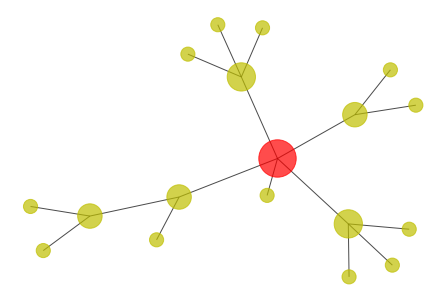

In [83]:
# first case is detected
G1 = nx.from_pandas_edgelist(infection_data_2[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
d = dict(G1.degree())
color_dct = infection_data_2[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G1.nodes()]
nx.draw(G1, node_size=[v * 200 for v in d.values()], node_color=values,label=True, alpha = 0.7)


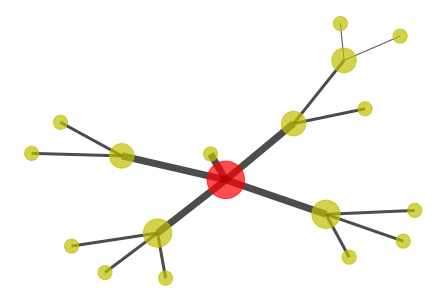

In [165]:
l1 = [y for (x,y) in G1.edges() if x =='H1'] 
l3 = l1[1:]
edge_list_weight = {}

for (x,y) in G1.edges():
    
    if x =="H1":
        edge_list_weight[(x,y)]=7
    elif x in l3:
        edge_list_weight[(x,y)]=3
    else:
        edge_list_weight[(x,y)]=1

        
width_values = [edge_list_weight.get(edge) for edge in G1.edges()]
nx.draw(G1, node_size=[v * 200 for v in d.values()], node_color=values,label=True, alpha = 0.7, width = width_values*5)

In [46]:
infection_data_3 = pd.read_excel(infection_data_file,sheet_name=2,
header=0,
index_col=False,
keep_default_na=True
)
infection_data_3['color'] = np.where(infection_data_3['Infected_Flag']=='Yes', 0.0, 1.0)
infection_data_3

,Incidence_number,Identification_number,Sanitized,Infected_Flag,Entity_Flag,confirm_Date,Contacted,Phone,Monitored_Till,cluster,Remarks,color
0,1,H1,NaN,Yes,Human,2019-12-15,H1,#1,NaT,1,NaN,0.0
1,2,C1,Yes,No,Car,2019-12-15,H1,#2,2019-12-29,1,NaN,1.0
2,3,H2,NaN,Yes,Human,2019-12-18,H1,#3,2020-01-01,3,NaN,0.0
3,4,P1,Yes,No,Place,2019-12-14,H1,#4,2019-12-28,1,NaN,1.0
4,5,H3,NaN,No,Human,2019-12-14,H1,#5,2019-12-28,1,NaN,1.0
5,6,H4,NaN,No,Human,2019-12-15,H1,#2,2019-12-29,1,C1,1.0
6,7,H5,NaN,No,Human,2019-12-14,H2,#6,2019-12-28,3,NaN,1.0
7,8,H6,NaN,No,Human,2019-12-14,H2,#7,2019-12-28,3,NaN,1.0
8,9,H7,NaN,No,Human,2019-12-14,H2,#8,2019-12-28,3,NaN,1.0
9,10,H8,NaN,No,Human,2019-12-14,H3,#9,2019-12-28,1,NaN,1.0


[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


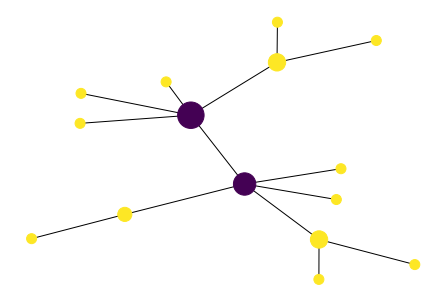

In [47]:
# first case is detected
G2 = nx.from_pandas_edgelist(infection_data_3[['Identification_number','Contacted']],source='Identification_number',target='Contacted')
d = dict(G2.degree())
color_dct = infection_data_3[['Identification_number','color']].to_dict('split')
color_dct = dict(color_dct['data'])
values = [color_dct.get(node) for node in G2.nodes()]
print(values)
nx.draw(G2, node_size=[v * 300 for v in d.values()], node_color=values,label=True)
#nx.draw(G)
